In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import bisect
from collections import OrderedDict
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r'dataset/covtype.csv')
# print(df)

In [3]:
#This step indicates conversion of df from csv file to dataframe
df = pd.DataFrame(df)


In [4]:
# checking datatypes using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

# IMPLEMENTING PCA FOR THE DATASET

In [5]:
# applying pca for the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dfnew1=principalDf['principal component 1']
dfnew2=principalDf['principal component 2']
dfnew = []

for i,j in zip(dfnew1,dfnew2):
  dfnew.append([i,j])
# print(dfnew)


In [1]:
#from our dataset contating 19613 rows and 18 columns we take only 100 rows
# plt.scatter(df['Block'][:500],df['Lot'][:500])
plt.scatter(dfnew1,dfnew2)
plt.show()

NameError: name 'plt' is not defined

In [7]:
# This snippet tries all clusters and gives us best fit
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
# print(wcss)

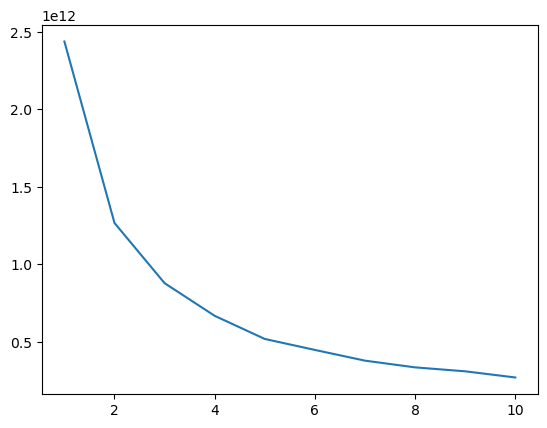

In [8]:
# plotting graph to see elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss)
plt.show()

# got bug from this code but fixed it

**he used else block to initilize the values. so for first value of every cluster it skips initilizing the value**

In [9]:
# from above we can say that no. of clusters should be 3
# In this step we will store them



kmeans = KMeans(n_clusters=3).fit(dfnew)
temp_clusters = OrderedDict()
for i, label in enumerate(kmeans.labels_):
    if label not in temp_clusters:
        temp_clusters[label] = []
    temp = list(dfnew[i])
    temp_clusters[label].append(temp)
# print(temp_clusters)
clusters = OrderedDict()

for i in sorted(temp_clusters.keys()):
  clusters[i] = temp_clusters[i]

# print(clusters[0])

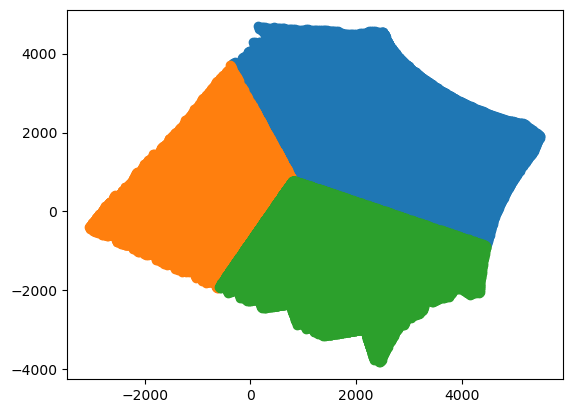

In [10]:
# plotting of cluster - 0
for i in clusters.keys():
    

    plt.scatter([j[0] for j in clusters[i]],[k[1] for k in clusters[i]])


# This is Main() Function

In [11]:
#step 1 : get centroid of clusters for this we can use bruteforce

centroid = np.array(kmeans.cluster_centers_)
print(centroid)



[[ 2605.19939635  1635.35391872]
 [-1078.4790414    146.20506528]
 [ 1362.65609855 -1117.45495187]]


In [12]:
#Let p1 be point -> [x1,y1]
#Let p2 be point -> [x2,y2]
def distance_between_two_points(p1,p2):
  return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5


In [13]:
#points array should be 2d that is in format of [[x,y],[a,b]...]
#centroid array should be 1d
#if some set of points are mapped to a centroid point then this process will be easy
#let dic = {0 : [[p1,p2],[p3,p4]] , 1 : [[p5,p6],[p7,p8]] , ....}
#let centroids array be [[c1,c2],[c3,c4],....]
#returned array will be nested list

def distance_from_centroid(dic,centroid):
  distances = []
  for i in dic.keys():
    temparr=[]
    for j in dic[i]:
      temparr.append(distance_between_two_points(j,centroid[i]))
    distances.append(temparr)
  print(temparr)
  return distances

In [14]:
#step 2 : calculate distances from centroid and store it in distances array

distances = distance_from_centroid(clusters,centroid)
# print(distances)

[2449.8860705732764, 2609.6505063715626, 2908.463625079332, 2897.9474348623357, 2843.198960639629, 1991.0822369326895, 1929.6198603784878, 3001.3522749478248, 2817.697310879228, 2688.0825185296935, 1895.0938821845032, 2138.50717844901, 940.8039600496775, 2014.062908434774, 2288.898926262635, 1586.6320311040472, 2133.9367703547923, 763.3867873257425, 1587.4503959933427, 2532.9752889555302, 1445.3469105146855, 1677.2034998381341, 717.3573507517793, 745.3346025431454, 642.0671873874401, 2673.3742239210496, 2931.557940246526, 321.1176074379697, 520.9110145301362, 1035.0346691233744, 1945.7797451445435, 828.4273451080231, 358.72161809147354, 1184.9616455961607, 202.38932659606115, 722.996030296475, 1720.1908528068855, 359.46140190939974, 712.535528716917, 2010.1645087593893, 528.8908546150997, 1509.570927538201, 552.1702326837632, 1470.1016916336096, 1584.5988682079717, 2029.8088821017877, 1911.89165528323, 795.2678065842773, 770.3799431126076, 945.2709658242832, 1716.5632989310648, 1753.10

In [15]:
#distances array should be 2d -> [[distances array of cluster 1],[distances array of cluster 2]....]
def mean(distances):
  mean_of_distances=[]
  for i in distances:
    l = len(i)
    s = sum(i)

    mean = s/l
    mean_of_distances.append(mean)
  return mean_of_distances

In [16]:
#step 3 : calculate mean of distances

avg_distances = mean(distances)
print(avg_distances)

[1554.8035057487527, 978.1540084998742, 1215.8067321535236]


In [17]:
#(standard deviation)^2 = sum((occurences - mean)*(occurences-mean))/total number of ocurences
def standard_deviation(distances,mean_of_distances):
  ind = 0
  stddev=[]
  for i in distances:
    temp = 0
    for j in i:
      sq = (mean_of_distances[ind] - j)**2
      temp+=sq
    ind += 1
    stddev.append((temp/len(i))**0.5)
    temp = 0
  return stddev

In [18]:
#step 4 : calculate standard deviation of distances

std_dev = standard_deviation(distances,avg_distances)
print(std_dev)

[696.0550513817025, 430.2873400236739, 515.2927999821795]


In [19]:
#this returns treshhold values of all clusters
def treshhold(stddev,mean_of_distances):
  # ran = random.uniform(0,1)
  # ran =int(input("please enter value for alpha which should be in between 0 to 1 "))
  ran=0.5
  tresh = []

  for i,j in zip(mean_of_distances,stddev):
    temp = i + (ran * j)
    tresh.append(temp)
  return tresh

In [20]:
#step 5 : calculate tresh hold values from mean and standard deviation

tresh = treshhold(std_dev,avg_distances)
print(tresh)

[1902.831031439604, 1193.2976785117112, 1473.4531321446134]


In [21]:
#In this we take parameters as distances array from distances_from_centroid function
#Another parameter is tresh 1d array from treshhold function
#this function returns avg cutoff distance of each cluster
def avg_cutoff_distance(distances,tresh):
  avg_co = {}
  cn = 0
  for i,j in zip(distances,tresh):
    temparr = [k for k in i if k<=j]
    s = sum(temparr)
    l = len(temparr)
    # print(len(distances))
    temp = s/l
    avg_co[cn] = temp
    cn+=1
  return avg_co

In [22]:
#step 6 : calculate average cutoff distance

avg_cd = avg_cutoff_distance(distances,tresh)

In [23]:
#this function returns local density of a point
#this function takes point, dictionary of points denoting clusters,avg cutoff distance of that cluster
#this returns local densities array

def local_density(dic,avg_co,ind):
  temp = []
  maxi = 0
  for i in dic[ind]:
    
    cn = 0
    for j in dic[ind]:
      d = distance_between_two_points(i,j)
      maxi = max(d,maxi)
      if d < avg_co[ind]:
        cn+=1
    temp.append(cn)
  temp.append(maxi)
  print(temp)
  return temp

In [24]:
# step 7 : calculate local_density and max distance of each cluster

max_values = []
local_densities=[]
for i in clusters.keys():
  temp = local_density(clusters,avg_cd,i)
  
  m = temp[-1]
  temp.pop(-1)
  local_densities.append(temp)
  max_values.append(m)
# print(local_densities)
# print(max_values)

KeyboardInterrupt: 

In [ ]:
#this function takes array and target element as input and returns index of element which is greater than previous one
def next_max_density(arr, target):
  arr1 = sorted(arr)
  pos = bisect.bisect_right(arr1, target)
  
  if pos==len(arr1):
    return target
  else:
    return arr1[pos]

In [ ]:
#this function takes arguments as local_density of points, clusters, maxi array.
def closest_distance_to_the_highest_density_points(local_densities,clusters,maxi,i):

  arr_of_req=[]
  for j in range(len(clusters[i])):

    next_max_density_element = next_max_density(local_densities[i],local_densities[i][j])
    next_max_density_element_index= local_densities[i].index(next_max_density_element)

    # calculating distance between the current point and the next max density point in the cluster
    temp =  distance_between_two_points(clusters[i][j],clusters[i][next_max_density_element_index])
  # if the point is the farthest in the cluster than the distance will be zero so add max distance value from the maxi arr
    if temp==0:
      arr_of_req.append(maxi[i])
    else:
      arr_of_req.append(temp)

  return arr_of_req

In [ ]:
# step 8 : calculating closest distance to highest density points for each point
closest_distance = []

for i in clusters.keys():
  temp = closest_distance_to_the_highest_density_points(local_densities,clusters,max_values,i)
  closest_distance.append(temp)



[[1, 1, 13, 399, 664, 557, 483, 533, 615, 704, 597, 277, 234, 199, 702, 640, 698, 725, 650, 475, 664, 643, 608, 592, 588, 662, 682, 689, 661, 617, 623, 608, 651, 698, 682, 653, 615, 501, 477, 408, 168, 491, 671, 645, 597, 710, 725, 706, 606, 259, 29, 177, 337, 683, 687, 715, 686, 598, 511, 453, 454, 544, 583, 604, 585, 631, 647, 656, 676, 701, 697, 678, 675, 640, 583, 631, 644, 651, 625, 604, 472, 212, 536, 351, 197, 205, 156, 373, 662, 639, 628, 670, 501, 375, 238, 183, 26, 344, 634, 679, 678, 679, 699, 692, 640, 585, 555, 541, 565, 579, 630, 634, 651, 665, 664, 674, 678, 670, 685, 651, 629, 665, 698, 682, 617, 559, 525, 599, 571, 537, 482, 495, 517, 499, 506, 603, 572, 488, 254, 420, 129, 45, 404, 702, 647, 648, 217, 63, 643, 659, 640, 671, 547, 640, 651, 644, 633, 622, 662, 682, 663, 673, 656, 661, 698, 628, 519, 624, 614, 587, 516, 565, 617, 653, 636, 505, 224, 169, 228, 68, 23, 21, 188, 617, 455, 347, 172, 227, 686, 680, 693, 675, 586, 535, 557, 628, 631, 633, 629, 657, 651, 616, 

**PLOTTING THE LOCAL DENSITY AND DISTANCE OF EACH CLUSTER VALUES BASED ON COLOR**

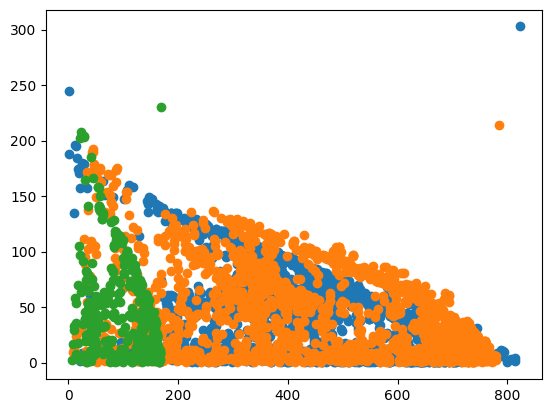

In [ ]:
# step 9 : plotting points with closest_distance on x axis and local_densities on y axis

for i in clusters.keys():
  plt.scatter(local_densities[i], closest_distance[i])


**dividing the clusters group into individual clusters and assigning its respective local density and distance
to it  and then soring the clusters with refernce to the local density's and combing the sorted cluster and its values into one list i.e cluster0[ [ ] ,[ ],[ ] ]**

In [ ]:
# dividing the clusters into 3 clusters 
cluster0=[]
cluster1=[]
cluster2=[]
cluster0.append(clusters[0])
cluster1.append(clusters[1])
cluster2.append(clusters[2])

cluster0_local_density=local_densities[0]
cluster1_local_density=local_densities[1]
cluster2_local_density=local_densities[2]

cluster0_closest_distance=closest_distance[0]
cluster1_closest_distance=closest_distance[1]
cluster2_closest_distance=closest_distance[2]

# print(cluster0[0])
# print(cluster0_local_density)
# print(cluster0_closest_distance)


# sorting the points in the cluster based on local density and also sorting the closest distance to the highest density points with refrerence to the local density
def bubble_sort(arr,cluster,closest_distance):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                cluster[j], cluster[j+1] = cluster[j+1], cluster[j]
                closest_distance[j], closest_distance[j+1] = closest_distance[j+1], closest_distance[j]

# Sort cluster0_local_density using bubble sort
bubble_sort(cluster0_local_density,cluster0[0],cluster0_closest_distance)

# Sort cluster1_local_density using bubble sort
bubble_sort(cluster1_local_density,cluster1[0],cluster1_closest_distance)

# Sort cluster2_local_density using bubble sort
bubble_sort(cluster2_local_density,cluster2[0],cluster2_closest_distance)

# print(cluster0[0])
# print(cluster0_local_density)
# print(cluster0_closest_distance)

# merging local densities and closest distances of all clusters
cluster0.append(cluster0_local_density)
cluster0.append(cluster0_closest_distance)
cluster1.append(cluster1_local_density)
cluster1.append(cluster1_closest_distance)
cluster2.append(cluster2_local_density)
cluster2.append(cluster2_closest_distance)
print(cluster0)
print(cluster1)
print(cluster2)
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))





[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [39.80184439283145, 65.99963163115204], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [173.87608894659516, 57.958829775870434], [173.0542504750444, 53.28739665887406], [-12.77360120211268, 58.82111841348705], [171.31948999674177, 49.47851469764534], [-2.6337187765888017, 60.14614759402123], [167.50408649453766, 46.34821016537806], [166.02936519614067, 48.604301210991174], [7.84371807577416, 58.43414401973482], [164.89821199461807, 49.85454225047233], [-5.933025955881246, 55.666463460494214], [-11.416850966835721, 50.66282741304585], [162.99208347299566, 48.02900048806327], [-16.90503641799878, 46.834726633729495], [-16.788757807410096, 43.86731286028936], [163.48959566338075, 44.993687274469856], [161.65375522716724, 46.274352875157234], [164.5040305417516, 42.418535994245914], [164.54069438977538, 40.09514338720245], [161.79619962029145, 43.29762379900484], [4.664

**TAKING THE PROBABLE OUTLIERS COUNT FOR EACH CLUSTER FROM THE USER AND SPLITTING THE CLUSTER**

In [ ]:
# finding  the outliers in each cluster
outlier_count=int(input("Enter the number of outliers you want to find in each cluster: "))
outliers_in_cluster0=[]
outliers_in_cluster1=[]
outliers_in_cluster2=[]
# storing the outliers in the cluster and its local density and closest distance

outliers_in_cluster0.append(cluster0[0][:outlier_count]) #for cluster points
outliers_in_cluster0.append(cluster0[1][:outlier_count]) #for local density 
outliers_in_cluster0.append(cluster0[2][:outlier_count]) #for closest distance

# similarly for cluster1 
outliers_in_cluster1.append(cluster1[0][:outlier_count])
outliers_in_cluster1.append(cluster1[1][:outlier_count])
outliers_in_cluster1.append(cluster1[2][:outlier_count])

# similarly for cluster2
outliers_in_cluster2.append(cluster2[0][:outlier_count])
outliers_in_cluster2.append(cluster2[1][:outlier_count])
outliers_in_cluster2.append(cluster2[2][:outlier_count])

print(outliers_in_cluster0)
print(outliers_in_cluster1)
print(outliers_in_cluster2)

[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [39.80184439283145, 65.99963163115204], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [173.87608894659516, 57.958829775870434], [173.0542504750444, 53.28739665887406], [-12.77360120211268, 58.82111841348705], [171.31948999674177, 49.47851469764534], [-2.6337187765888017, 60.14614759402123], [167.50408649453766, 46.34821016537806], [166.02936519614067, 48.604301210991174], [7.84371807577416, 58.43414401973482], [164.89821199461807, 49.85454225047233], [-5.933025955881246, 55.666463460494214], [-11.416850966835721, 50.66282741304585], [162.99208347299566, 48.02900048806327], [-16.90503641799878, 46.834726633729495], [-16.788757807410096, 43.86731286028936], [163.48959566338075, 44.993687274469856], [161.65375522716724, 46.274352875157234], [164.5040305417516, 42.418535994245914], [164.54069438977538, 40.09514338720245], [161.79619962029145, 43.29762379900484], [4.664

**PLOTING THE GRAPH FOR MERGER LOCAL DENSITY AND DISTANCE FORM INDIVIDUAL CLUSTERS**

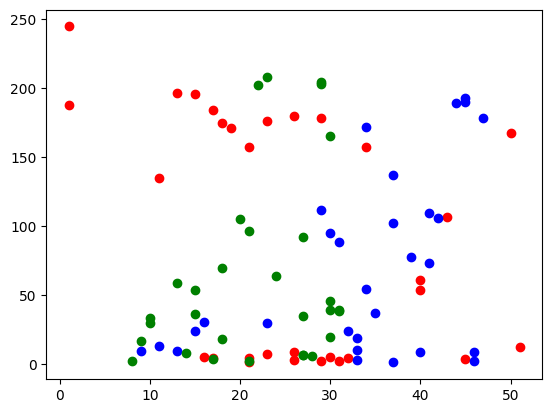

In [ ]:
# ploting them into the graph
plt.scatter(outliers_in_cluster0[1],outliers_in_cluster0[2],color='red',label='outliers in cluster 0')
plt.scatter(outliers_in_cluster1[1],outliers_in_cluster1[2],color='blue',label='outliers in cluster 1')
plt.scatter(outliers_in_cluster2[1],outliers_in_cluster2[2],color='green',label='outliers in cluster 2')

**PLOTING THE GRAPH FOR DATA POINTS OF PROBABLE OUTLIERS WITH IN THE INDIVIDUAL CLUSTER**

**REMEMBER CLUSTERS WILL INTERCHANGE SOME TIMES**

**CLUSTER 1**

[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [39.80184439283145, 65.99963163115204], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [173.87608894659516, 57.958829775870434], [173.0542504750444, 53.28739665887406], [-12.77360120211268, 58.82111841348705], [171.31948999674177, 49.47851469764534], [-2.6337187765888017, 60.14614759402123], [167.50408649453766, 46.34821016537806], [166.02936519614067, 48.604301210991174], [7.84371807577416, 58.43414401973482], [164.89821199461807, 49.85454225047233], [-5.933025955881246, 55.666463460494214], [-11.416850966835721, 50.66282741304585], [162.99208347299566, 48.02900048806327], [-16.90503641799878, 46.834726633729495], [-16.788757807410096, 43.86731286028936], [163.48959566338075, 44.993687274469856], [161.65375522716724, 46.274352875157234], [164.5040305417516, 42.418535994245914], [164.54069438977538, 40.09514338720245], [161.79619962029145, 43.29762379900484], [4.6642

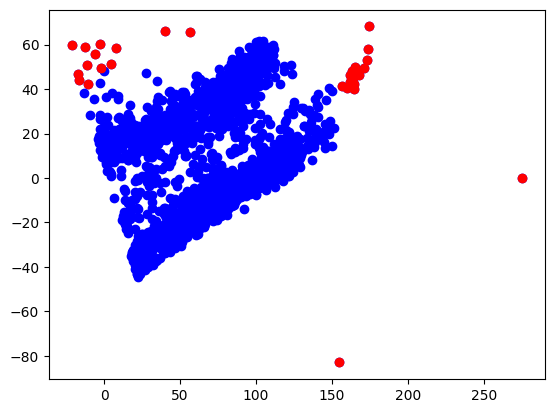

In [ ]:
plt.scatter([i[0] for i in cluster0[0]],[i[1] for i in cluster0[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster0[0]],[i[1] for i in outliers_in_cluster0[0]],color='red')
print(outliers_in_cluster0[0])

**MERGING ALL CLUSTERS INTO SINGLE CLUSTER**

**CLUSTER 2**

[[-149.13811150969738, 35.825097687027466], [-140.15335598316318, 33.36348914769815], [-126.85231471074036, 33.384971137940724], [-121.09689931367627, 41.1503281197498], [-132.26677074087775, 20.32315052103776], [-112.71954369753674, 43.16968368300152], [-126.83536536789344, 17.41349415208917], [-23.72540164087268, 59.34373522276497], [-114.49381372849595, 32.317775614971886], [-29.927084791973964, 58.91257924072939], [-52.82958027915472, 65.04075725553106], [-61.97948934235907, 63.68378936616197], [-39.98217234066072, 64.04682515846385], [-42.93796622722201, 63.415032142539424], [-143.1331443755477, -117.71925786650252], [-94.84649099199198, 47.161073952681335], [-119.83196897207314, 20.18695406258526], [-146.50324304354257, -114.3103485555379], [-21.633316782285785, 50.752043968537], [-118.77083401634057, 19.893648176924465], [-52.81481098737841, 60.91094392825383], [-46.05084832943684, 55.81333617489435], [-86.63804167396138, 48.815534975383265], [-138.55636720686266, -2.76589250863

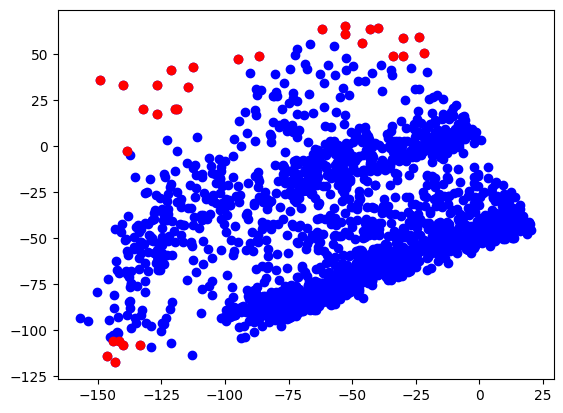

In [ ]:
plt.scatter([i[0] for i in cluster1[0]],[i[1] for i in cluster1[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster1[0]],[i[1] for i in outliers_in_cluster1[0]],color='red')
print(outliers_in_cluster1[0])

**CLUSTER 3**

[[-136.60295226392853, 51.98437561977818], [-136.433152980714, 54.33005325744743], [-119.81105676806958, 53.70663434025005], [-123.20424788019568, 52.14145981098185], [-90.51117045252832, 57.43627436261299], [-146.40863877811154, 75.05398683551877], [-138.9806677939487, 72.94999730783657], [-122.43376348189649, 58.05355238742573], [-86.46433502109436, 61.33707413267431], [-86.69637727005768, 65.18194460801098], [-27.42933942083311, 74.96618885804408], [-22.72099821625439, 92.35590840709658], [-126.27797283516131, 73.59919508284393], [-28.283591208559518, 82.37473478493911], [-30.104890965152673, 81.54666229820175], [-84.82150129771969, 276.27641665909863], [-101.15500989651814, 69.26596229399716], [-38.142008991853935, 76.64581262247273], [-37.91153586435751, 76.63059207761775], [-78.88048101637193, 71.46868871718982], [-135.5636865484034, 85.90110144139713], [-44.48092024773495, 75.08999173407895], [-48.80166018255988, 71.71616923951521], [-45.948977378719384, 73.47339148835492], [-88

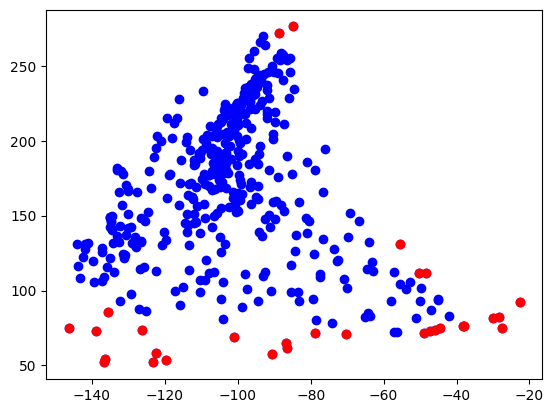

In [ ]:
plt.scatter([i[0] for i in cluster2[0]],[i[1] for i in cluster2[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster2[0]],[i[1] for i in outliers_in_cluster2[0]],color='red')
print(outliers_in_cluster2[0])

**MERGING ALL THE PROBABLE OUTLIERS FROM DIFFERENT CLUSTERS INTO ONE CLUSTER**

In [ ]:
# merging the outliers of all clusters
merged_outliers=[]
merged_outliers=outliers_in_cluster0
for i in range(outlier_count):
    merged_outliers[0].append(outliers_in_cluster1[0][i])
    merged_outliers[1].append(outliers_in_cluster1[1][i])
    merged_outliers[2].append(outliers_in_cluster1[2][i])
for i in range(outlier_count):
    merged_outliers[0].append(outliers_in_cluster2[0][i])
    merged_outliers[1].append(outliers_in_cluster2[1][i])
    merged_outliers[2].append(outliers_in_cluster2[2][i])
print(merged_outliers)

    

[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [39.80184439283145, 65.99963163115204], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [173.87608894659516, 57.958829775870434], [173.0542504750444, 53.28739665887406], [-12.77360120211268, 58.82111841348705], [171.31948999674177, 49.47851469764534], [-2.6337187765888017, 60.14614759402123], [167.50408649453766, 46.34821016537806], [166.02936519614067, 48.604301210991174], [7.84371807577416, 58.43414401973482], [164.89821199461807, 49.85454225047233], [-5.933025955881246, 55.666463460494214], [-11.416850966835721, 50.66282741304585], [162.99208347299566, 48.02900048806327], [-16.90503641799878, 46.834726633729495], [-16.788757807410096, 43.86731286028936], [163.48959566338075, 44.993687274469856], [161.65375522716724, 46.274352875157234], [164.5040305417516, 42.418535994245914], [164.54069438977538, 40.09514338720245], [161.79619962029145, 43.29762379900484], [4.664

**SORTING ALL THE PROBABLE OUTLIERS BASED ON THE LOCAL DENSITY**

In [ ]:
# sorting the merged outliers based on local density
for i in range(len(merged_outliers[1])):
    for j in range(i+1,len(merged_outliers[1])):
        if merged_outliers[1][i]>merged_outliers[1][j]:  #[1] is local density
            merged_outliers[1][i],merged_outliers[1][j]=merged_outliers[1][j],merged_outliers[1][i]
            merged_outliers[0][i],merged_outliers[0][j]=merged_outliers[0][j],merged_outliers[0][i]
            merged_outliers[2][i],merged_outliers[2][j]=merged_outliers[2][j],merged_outliers[2][i]
print("After sorting based on local density")
print(merged_outliers)



After sorting based on local density
[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [-136.60295226392853, 51.98437561977818], [-149.13811150969738, 35.825097687027466], [-136.433152980714, 54.33005325744743], [-119.81105676806958, 53.70663434025005], [-123.20424788019568, 52.14145981098185], [39.80184439283145, 65.99963163115204], [-140.15335598316318, 33.36348914769815], [174.43044493473448, 68.14124516818706], [-126.85231471074036, 33.384971137940724], [-90.51117045252832, 57.43627436261299], [-146.40863877811154, 75.05398683551877], [-21.44513219345308, 60.02187718422514], [-121.09689931367627, 41.1503281197498], [-138.9806677939487, 72.94999730783657], [-122.43376348189649, 58.05355238742573], [173.87608894659516, 57.958829775870434], [-132.26677074087775, 20.32315052103776], [-12.77360120211268, 58.82111841348705], [173.0542504750444, 53.28739665887406], [-86.46433502109436, 61.33707413267431], [171.31948999674177, 49.47851469764534], [-86.6

In [ ]:
#plotting the merged outliers to verify with previous individual local clusters based on local density and closest distance
# plt.scatter(merged_outliers[1],merged_outliers[2],color='blue',label='merged outliers')

**PROBABLE OUTLIERS WITH IN THE DATASET**

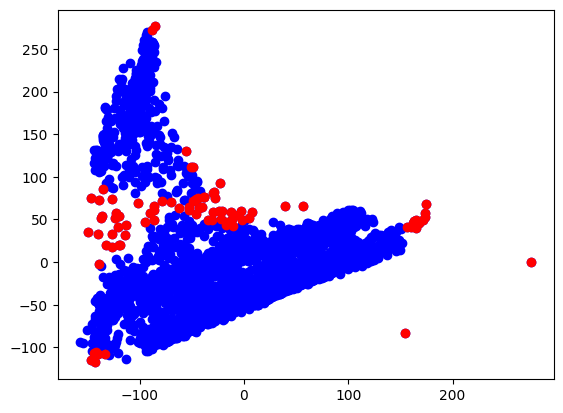

In [ ]:
# plotting the outliers point not density and closest distance
plt.scatter(dfnew1,dfnew2,color='blue',label='normal points')

plt.scatter([i[0] for i in merged_outliers[0]],[j[1] for j in merged_outliers[0]],color='red',label='outliers')

**PERFORMING ODF ON THE MERGED POINTS**

In [ ]:
# mean calculation for the merged outliers closest distance
def mean(arr):
    return sum(arr)/len(arr)

In [ ]:
# variance calculation for the merged outliers closest distance
def variance(arr):
    mean1=mean(arr)
    variance1=sum((x-mean1)**2 for x in arr)/len(arr)
    return variance1

In [ ]:
# function calculation for gaussian distribution function calculation
def gaussain_distribution_function_calculation(x,mean,variance):
    return (1/(math.sqrt(2*math.pi*variance)))*math.exp(-((x-mean)**2)/(2*variance))

In [ ]:
# finding the outliers factor using gaaussain distribution function
def gaussain_distribution_function(density,distance):
    outliers_factor=[]
    for i in range(len(density)):
        outliers_factor.append((density[i]*gaussain_distribution_function_calculation(distance[i],mean(distance),variance(distance))))
    return outliers_factor


**CALLING THE ODF FUNCTION**

In [ ]:
outlier_factor=gaussain_distribution_function(merged_outliers[1],merged_outliers[2])
print(outlier_factor)
print(len(outlier_factor))

[0.00038014942843564664, 0.0016771868726958644, 0.018288232032606985, 0.021440902071788562, 0.02461600583525151, 0.026452421157345425, 0.026811439751205108, 0.030719685014426214, 0.032577360764263104, 0.03366962796380539, 0.03460268630015763, 0.03547968435084916, 0.03950758018956785, 0.04176264327729745, 0.043260394340590196, 0.044493149032272805, 0.04472233627920005, 0.046062418832700174, 0.047259292717482804, 0.0486051550483115, 0.04967569085583839, 0.051377106750180854, 0.05463015971755451, 0.05736155443762656, 0.05761713252072851, 0.05884225472042101, 0.06134624877895704, 0.06356575164316863, 0.06852112412315552, 0.06880689039427705, 0.0689468814464099, 0.06910500123984493, 0.07069276252332457, 0.0713476208922907, 0.07154757917579137, 0.07188054747056864, 0.07203157134194084, 0.07231045787377144, 0.07771584312435519, 0.07805901100274208, 0.07818302212577118, 0.08130388841744363, 0.08669502620779825, 0.09335249826200487, 0.09435638880792008, 0.09462406220927827, 0.09567465627902697,

**merging the outlier_factor with the merged outliers**

In [ ]:
merged_outliers.append(outlier_factor)
print(merged_outliers)
print(len(merged_outliers))

[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [-136.60295226392853, 51.98437561977818], [-149.13811150969738, 35.825097687027466], [-136.433152980714, 54.33005325744743], [-119.81105676806958, 53.70663434025005], [-123.20424788019568, 52.14145981098185], [39.80184439283145, 65.99963163115204], [-140.15335598316318, 33.36348914769815], [174.43044493473448, 68.14124516818706], [-126.85231471074036, 33.384971137940724], [-90.51117045252832, 57.43627436261299], [-146.40863877811154, 75.05398683551877], [-21.44513219345308, 60.02187718422514], [-121.09689931367627, 41.1503281197498], [-138.9806677939487, 72.94999730783657], [-122.43376348189649, 58.05355238742573], [173.87608894659516, 57.958829775870434], [-132.26677074087775, 20.32315052103776], [-12.77360120211268, 58.82111841348705], [173.0542504750444, 53.28739665887406], [-86.46433502109436, 61.33707413267431], [171.31948999674177, 49.47851469764534], [-86.69637727005768, 65.18194460801098], [-

**SORTING THE ARRAY WITH REFERNCE TO OUTLIERS_FACTOR**

In [ ]:
# soring the merged outliers based on the outliers factor
for i in range(len(merged_outliers[3])):
    for j in range(i+1,len(merged_outliers[3])):
        if merged_outliers[3][i]>merged_outliers[3][j]:  #[3] is outliers factor
            merged_outliers[3][i],merged_outliers[3][j]=merged_outliers[3][j],merged_outliers[3][i]
            merged_outliers[0][i],merged_outliers[0][j]=merged_outliers[0][j],merged_outliers[0][i]
            merged_outliers[1][i],merged_outliers[1][j]=merged_outliers[1][j],merged_outliers[1][i]
            merged_outliers[2][i],merged_outliers[2][j]=merged_outliers[2][j],merged_outliers[2][i]
print("After sorting based on outliers factor")
print(merged_outliers)
print(len(merged_outliers))

After sorting based on outliers factor
[[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [-84.82150129771969, 276.27641665909863], [-136.60295226392853, 51.98437561977818], [-30.104890965152673, 81.54666229820175], [-12.77360120211268, 58.82111841348705], [-149.13811150969738, 35.825097687027466], [-48.80166018255988, 71.71616923951521], [-45.948977378719384, 73.47339148835492], [-136.433152980714, 54.33005325744743], [171.31948999674177, 49.47851469764534], [-140.15335598316318, 33.36348914769815], [39.80184439283145, 65.99963163115204], [-2.6337187765888017, 60.14614759402123], [-119.81105676806958, 53.70663434025005], [-123.20424788019568, 52.14145981098185], [-126.85231471074036, 33.384971137940724], [164.89821199461807, 49.85454225047233], [-146.40863877811154, 75.05398683551877], [162.99208347299566, 48.02900048806327], [173.87608894659516, 57.958829775870434], [

**TAKING TOP N PROBABLE OUTLIERS INPUT FROM THE USER**

In [ ]:
global_out_liers_count=int(input("Their are total "+str(len(merged_outliers[0]))+" probable outliers in the dataset ,please enter the number of outliers you want to select as global outliers: "))


**TAKING THE GLOBAL OUTLIERS FROM THE DATASET**

[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [-84.82150129771969, 276.27641665909863], [-136.60295226392853, 51.98437561977818], [-30.104890965152673, 81.54666229820175], [-12.77360120211268, 58.82111841348705], [-149.13811150969738, 35.825097687027466], [-48.80166018255988, 71.71616923951521]]


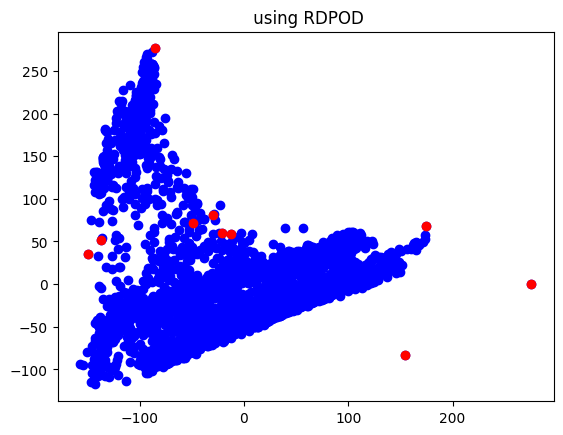

In [ ]:
global_out_liers=merged_outliers[0][:global_out_liers_count]
print(global_out_liers)


plt.title('RDPOD')

plt.scatter(dfnew1,dfnew2,color='blue',label='normal points')
plt.scatter([i[0] for i in global_out_liers],[j[1] for j in global_out_liers],color='red',label='global outliers')

## EXTERME LEARNING MACHINE

In [ ]:
# converting global_out_liers into a data frame for elm
global_out_liers_list=pd.DataFrame(global_out_liers)



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class ELMOutlierDetector:
    def __init__(self, hidden_layer_size=100, activation_func='relu'):
        self.hidden_layer_size = hidden_layer_size
        self.activation_func = activation_func

    def fit(self, X):
        input_size = X.shape[1]
        self.hidden_weights = np.random.randn(input_size, self.hidden_layer_size) # random weights for input layer
        H = np.maximum(0, np.dot(X, self.hidden_weights))   #relu activation function
        self.output_weights = np.linalg.pinv(H)

    def predict(self, X):
        H = np.maximum(0, np.dot(X, self.hidden_weights))
        predictions = np.dot(H, self.output_weights)
        errors = np.linalg.norm(X - np.dot(H, self.hidden_weights), axis=1) # calculating the error and flattening it
        return errors




dataset = global_out_liers_list

# Instantiate and use ELMOutlierDetector
elm_detector = ELMOutlierDetector(hidden_layer_size=dataset.shape[1])
elm_detector.fit(dataset)
outlier_scores = elm_detector.predict(dataset)
threshold = np.percentile(outlier_scores, 60) #----->                     the value is the threshold for the outliers, change the value to get different number of outliers
outliers = dataset[outlier_scores > threshold]


#changing data frame to list
outliers_list=outliers.values.tolist()
print(outliers_list)






[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [174.43044493473448, 68.14124516818706], [-149.13811150969738, 35.825097687027466]]


# Result analysis


## using rdpod

[[275.30849412310005, 0.18177753680495864], [154.37960500557358, -82.98296776320167], [174.43044493473448, 68.14124516818706], [-21.44513219345308, 60.02187718422514], [-84.82150129771969, 276.27641665909863], [-136.60295226392853, 51.98437561977818], [-30.104890965152673, 81.54666229820175], [-12.77360120211268, 58.82111841348705], [-149.13811150969738, 35.825097687027466], [-48.80166018255988, 71.71616923951521]]


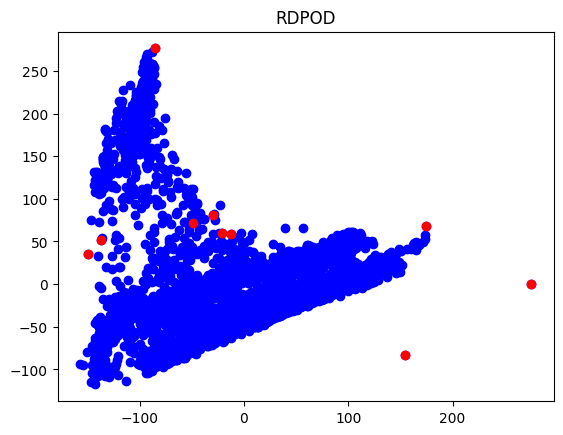

In [ ]:
global_out_liers=merged_outliers[0][:global_out_liers_count]
print(global_out_liers)


plt.title('RDPOD')

plt.scatter(dfnew1,dfnew2,color='blue',label='normal points')
plt.scatter([i[0] for i in global_out_liers],[j[1] for j in global_out_liers],color='red',label='global outliers')

## using elm


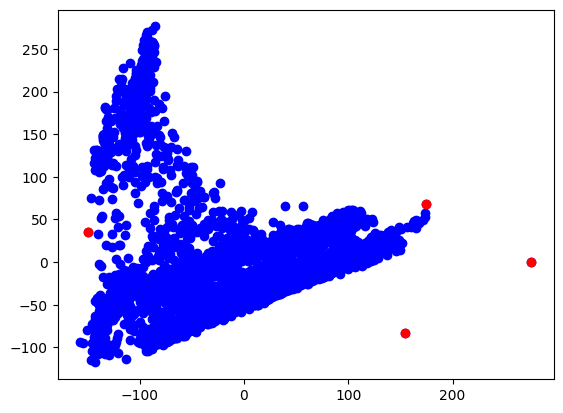

In [ ]:
# plotting the global outliers
plt.scatter(dfnew1,dfnew2,color='blue',label='inliers')   
plt.scatter([i[0] for i in outliers_list],[j[1] for j in outliers_list],color='red',label='outliers')

## LOF algorithm

[-1 -1 -1 ...  1  1  1]


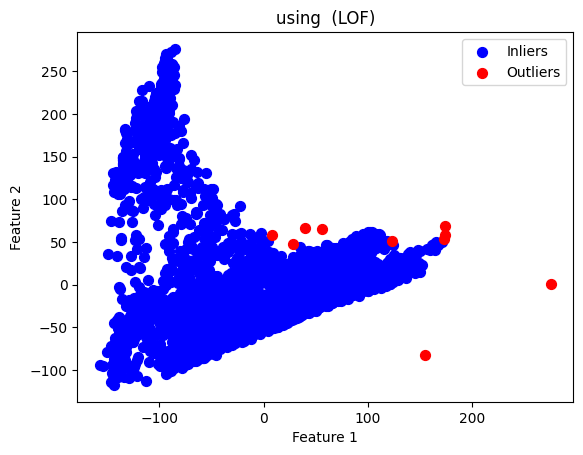

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

X = dfnew
#finging how many outliers you need to find
outlier_count=global_out_liers_count


#converting it into percentage
outlier_count_percentage=outlier_count/len(X)


# Fit the model
clf = LocalOutlierFactor(n_neighbors=50, contamination=outlier_count_percentage) # Adjust parameters as needed
y_pred = clf.fit_predict(X)
scores_pred = clf.negative_outlier_factor_
print(y_pred)
# Inlier points
inliers = np.where(y_pred == 1)
for i in inliers:
    inlier_points_1 = dfnew1[i]
    inlier_points_2 = dfnew2[i]
plt.scatter(inlier_points_1,inlier_points_2, color='blue', s=50, label='Inliers')

# Outlier points
outliers = np.where(y_pred == -1)
for i in outliers:
    outlier_points_1 = dfnew1[i]
    outlier_points_2 = dfnew2[i]
plt.scatter(outlier_points_1,outlier_points_2, color='red', s=50, label='Outliers')

plt.title('using  (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Relative density based factor algorithm

[1 1 1 ... 0 0 0]


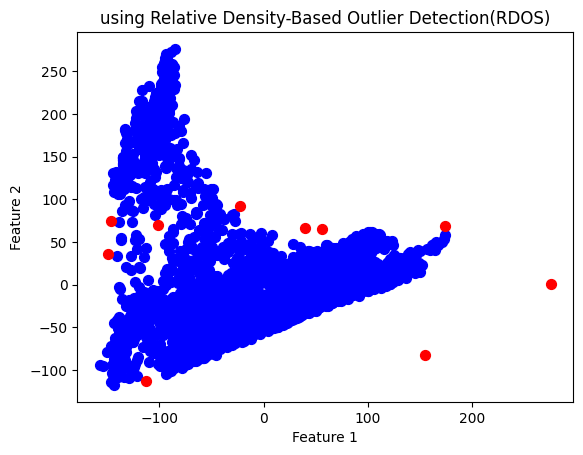

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

class RDOS:
    def __init__(self, k=5, contamination=0.1):
        self.k = k  # Number of neighbors
        self.contamination = contamination  # Expected proportion of outliers

    def fit_predict(self, X):
        # Step 1: Compute distances to k-nearest neighbors
        nbrs = NearestNeighbors(n_neighbors=self.k + 1).fit(X)
        distances, _ = nbrs.kneighbors(X)
        avg_distances = np.mean(distances[:, 1:], axis=1)

        # Step 2: Compute relative density for each data point
        relative_density = 1.0 / (avg_distances + 1e-10)

        # Step 3: Compute outlier score as the inverse of relative density
        outlier_scores = 1.0 / (relative_density + 1e-10)

        # Step 4: Identify outliers based on the contamination parameter
        threshold = np.percentile(outlier_scores, (1 - self.contamination) * 100)
        outliers = outlier_scores > threshold

        return outliers.astype(int)
data = dfnew
#finging how many outliers you need to find
outlier_count=global_out_liers_count


#converting it into percentage
outlier_count_percentage=outlier_count/len(X)

# For example, handle missing values and scale features
# Here, we'll assume all features are numerical and scale them
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

rdos = RDOS(k=10, contamination=outlier_count_percentage)
outliers = rdos.fit_predict(data_scaled)
# The 'outliers' array contains 0 for normal data points and 1 for outliers

print(outliers)

inlier_points = np.where(outliers == 0)
for i in inlier_points:
    inlier_points_1 = dfnew1[i]
    inlier_points_2 = dfnew2[i]
plt.scatter(inlier_points_1,inlier_points_2, color='blue', s=50, label='Inliers')


outlier_points = np.where(outliers == 1)
for i in outlier_points:
    outlier_points_1 = dfnew1[i]
    outlier_points_2 = dfnew2[i]
plt.scatter(outlier_points_1,outlier_points_2, color='red', s=50, label='outliers')

plt.title('using Relative Density-Based Outlier Detection(RDOS)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

